# London Crimes - Hypothesis Testing
In this project, I am interested in working to understand the crime rate in London, England. My goal is to work through this notebook to understand violent crime rates and when they are likely to occur throughout the year. This dataset contains all crimes (non-violent and violent) committed between 2008and 2016. However, the nature of the crime-violent or non-violent- is not specified in this dataset, so we will need to deal with that during the preprocessing phase. We will also need to specify which months are the ones when daylight saving is in effect.<br> <br>
My initial assumption is that violent crime rates increase when daylight saving is not in effect, which means that the night is longer. If you are interested in downloading the dataset, please click on [this Kaggle link](https://www.kaggle.com/datasets/jboysen/london-crime).

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm

%matplotlib inline

In [2]:
# read csv and import data
df = pd.read_csv('london_crime.csv')

# make a copy
crime_df = df.copy()

## Examining Dataset
### `1.` Understanding The Dataset

In [3]:
crime_df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
print(f"There are a total of {crime_df.shape[0]} rows in the dataset.")

There are a total of 13490604 rows in the dataset.


In [5]:
crime_df.borough.value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

**It seems like most of the crimes took play in the Croydon borough which is then followed by Barnet and Ealing. However, the least amount of crimes took place in the City of London which is pretty surprising since I thought that the city center would have the higher crime rates. Not only that, the crime rate for the City of London is almost 1/3 that of the second lowest -  Kingston upon Thames.**

In [6]:
crime_df.month.value_counts().sort_index()

1     1124217
2     1124217
3     1124217
4     1124217
5     1124217
6     1124217
7     1124217
8     1124217
9     1124217
10    1124217
11    1124217
12    1124217
Name: month, dtype: int64

In [7]:
crime_df.value.min(), crime_df.value.max()

(0, 309)

In [8]:
crime_df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [9]:
crime_df.duplicated().sum()

0

**Luckily, there are not duplicates or null in the dataset. However, even though if there were some duplicates, it wouldn't make any sense to remove them since the same crime can happen in the same month and in the same location.**

### `2.` Understanding The Different Types Of Crimes

In [10]:
crime_df.major_category.unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [11]:
crime_df.minor_category.unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

In [12]:
# checking the different types of violent crimes
crime_df[crime_df.major_category == 'Violence Against the Person'].minor_category.value_counts()

Common Assault         522180
Harassment             522072
Assault with Injury    521856
Wounding/GBH           519372
Other violence         512028
Offensive Weapon       481896
Murder                  92340
Name: minor_category, dtype: int64

In [13]:
crime_df[crime_df.major_category == 'Other Notifiable Offences'].minor_category.value_counts()

Other Notifiable    519696
Going Equipped      256608
Name: minor_category, dtype: int64

In [14]:
crime_df[crime_df.major_category == 'Robbery'].minor_category.value_counts()

Personal Property    520668
Business Property    418716
Name: minor_category, dtype: int64

In [15]:
crime_df[crime_df.major_category == 'Burglary'].minor_category.value_counts()

Burglary in Other Buildings    522072
Burglary in a Dwelling         521532
Name: minor_category, dtype: int64

In [16]:
crime_df[crime_df.major_category == 'Sexual Offences'].minor_category.value_counts()

Other Sexual    81108
Rape            27000
Name: minor_category, dtype: int64

In [17]:
crime_df[crime_df.major_category == 'Theft and Handling'].minor_category.value_counts()

Other Theft                               522180
Theft From Motor Vehicle                  522180
Theft/Taking Of Motor Vehicle             522072
Motor Vehicle Interference & Tampering    520452
Other Theft Person                        519480
Theft/Taking of Pedal Cycle               516996
Handling Stolen Goods                     426168
Theft From Shops                          416772
Name: minor_category, dtype: int64

In [18]:
crime_df[crime_df.major_category == 'Criminal Damage'].minor_category.value_counts()

Criminal Damage To Motor Vehicle     521964
Other Criminal Damage                521856
Criminal Damage To Dwelling          521424
Criminal Damage To Other Building    503928
Name: minor_category, dtype: int64

## Preprocessing Data

In [19]:
def create_columns(df):
    """
    Description:this function creates two columns: violent and is_daylight_saving 
                with 0 and 1 binary encodings.
    
    INPUT:
    df - (pandas dataframe) a dataframe that we are interested in preprocessing.
    
    OUTPUT:
    df - (pandas dataframe) a dataframe where the following columns have been created:
        1. violent - 0 for non-violent crime and  for violent crime.
        2. is_daylight_saving - 0 for not daylight saving and 1 for is daylight saving.
    """
    # identidying the violent crimes and daylight saving months and put them all in a list
    violent_crimes = ['Burglary', 'Violence Against the Person', 'Robbery', 'Sexual Offences']
    is_daylight_saving = list(range(3,12))
    
    # encode the each respective columns with 0 and 1(binary)
    df['violent'] = [1 if x in violent_crimes else 0 for x in df['major_category']]
    df['daylight_saving'] = [1 if x in is_daylight_saving else 0 for x in df['month']]
    
    return df

In [20]:
create_columns(crime_df)

,lsoa_code,borough,major_category,minor_category,value,year,month,violent,daylight_saving
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,1,1
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,1,1
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,1,1
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,1,1
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,1,1
...,...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,0,0
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,1,1
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,1,0
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,1,1


## Probablity
**`1.`** What is the probability of a violent crime occuring regardless of daylight saving status?

In [21]:
violent_prob_mean = crime_df['violent'].mean()
print(f"Probability of violent crime regardless of daylight saving status: {violent_prob_mean}.")

Probability of violent crime regardless of daylight saving status: 0.3901115176162609.


**`2.`** Given that daylight saving is happening, what is the probability of a violent crime occuring?

In [22]:
violent_isdaylight = crime_df[crime_df.daylight_saving == 1]['violent'].mean()
print(f"Probability of violent crime during daylight saving: {violent_isdaylight}.")

Probability of violent crime during daylight saving: 0.3901115176162609.


**`3.`** Given that daylight saving is not happening, what is the probability of a violent crime occuring?

In [23]:
violent_notdaylight = crime_df[crime_df.daylight_saving == 0]['violent'].mean()
print(f"Probability of violent crime not during daylight saving: {violent_notdaylight}.")

Probability of violent crime not during daylight saving: 0.3901115176162609.


**`4.`** What is the probability of a crime occuring when daylight saving is not in effect?

In [24]:
print(f"Probability of a crime occuring when daylight saving is not in effect: \
{crime_df.daylight_saving.value_counts()[0]/len(crime_df)}.")

Probability of a crime occuring when daylight saving is not in effect: 0.25.


**From the probablities that we've calculated above, there doesn't seem to be sufficient evidence to suggest that the percentage of violent crimes increases when daylight saving is not in effect. In fact, we can see that the violent crime rate is equal to one another, regardless of whether or not daylight saving is in effect.**

## Hypothesis Testing
**At the beginning, we assumed that violent crime rates is higher when daylight saving is not in effect. Therefore, our hypotheses are as shown down below. We will also assume that a Typer 1 Error rate of 0.05. <br> <br>
Null Hypothesis: The difference between the violent crime rates when daylight saving is and isn't in effect is less than or equal to 0. <br><br>
$$H_0: p_{notdaylight} - p_{isdaylight} \leq 0$$
Alternative Hypothesis: The difference between the violent crime rates when daylight saving is and isn't in effect is greater than 0.<br><br>
$$H_1: p_{notdaylight} - p_{isdaylight} > 0$$**
<br>

First, let us reiterate what we found above. We will assume that the $p_{notdaylight}$ and $p_{isdaylight}$ have the same rate equal to the violent crime rate regardless of whether or not daylight saving is in effect. <br><br>
**`1.`** Find the violent crime rate under the null. Also, find out what $n_{notdaylight}$ and $n_{isdaylight}$.

In [25]:
# p_notdaylight = p_isdaylight = violent_prob_mean
violent_prob_mean = crime_df['violent'].mean()
# number of crimes commited not during daylight saving
n_notdaylight = crime_df.query("daylight_saving == 0").shape[0]
# number of crimes commited during daylight saving
n_isdaylight = crime_df.query("daylight_saving == 1").shape[0]

**`2.`** Simulate $n_{notdaylight}$ and $n_{isdaylight}$ with their respective violent crime rate. In this case, $p_{notdaylight}$ and $p_{isdaylight}$ are both represented by `violent_prob_mean`.

In [26]:
# Since there are only 2 mutually exclusive outcomes for our trial, we will use random.binomial(n, p, size)
notdaylight_violent = np.random.binomial(1, violent_prob_mean, n_notdaylight)
notdaylight_violent

array([0, 0, 1, ..., 0, 1, 0])

In [27]:
isdaylight_violent = np.random.binomial(1, violent_prob_mean, n_isdaylight)
isdaylight_violent

array([0, 0, 0, ..., 0, 1, 1])

**`3.`** Find $p_{notdaylight} - p_{isdaylight}$ for our simulated values.

In [28]:
notdaylight_violent.mean() - isdaylight_violent.mean()

1.779015972891429e-05

**`4.`** Run Simulation

In [29]:
p_diffs = []

# running binomial simulations
notdaylight_violent_simulate = np.random.binomial(n_notdaylight, violent_prob_mean, 15000)/n_notdaylight
isdaylight_violent_simulate = np.random.binomial(n_isdaylight, violent_prob_mean, 15000)/n_isdaylight

# calculate and store simulated differences 
p_diffs = notdaylight_violent_simulate - isdaylight_violent_simulate

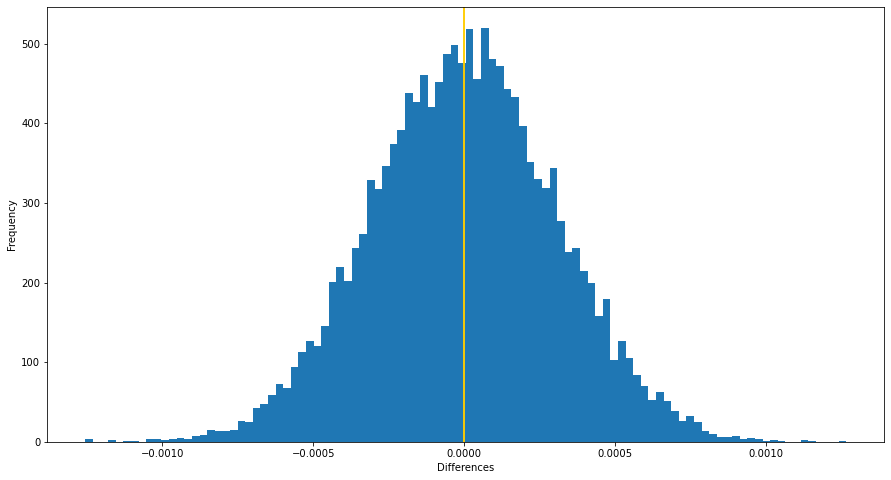

In [30]:
# calculating observed difference
obs_diff = violent_notdaylight - violent_isdaylight

# plot the results
plt.figure(figsize = (15,8))
plt.hist(p_diffs, bins = 100)
plt.axvline(p_diffs.mean(), color = 'red', label = 'Simulated Difference')
plt.axvline(obs_diff, color = 'yellow', label = 'Observed Difference')
plt.xlabel("Differences")
plt.ylabel("Frequency");

In [31]:
print(f"Our observed difference is {obs_diff}.")
print(f"The proportion of p_diffs greater than observed difference is(p-value): \
{(p_diffs > obs_diff).mean()}")

Our observed difference is 0.0.
The proportion of p_diffs greater than observed difference is(p-value): 0.5014666666666666


**Since our p-value is greater than the Type 1 Error of 0.05, we have failed to reject the null hypothesis, which means that there is strong evidence supporting it. Since the p-value is greater than 0.05, we can conclude that it isn't statistically significant. This also means that the violent crime rate in London isn't higher when daylight saving is not in effect.<br><br>
Using the `proportions_ztest` method, we can see that we have also achieved similar results. Please refer to [this link for how to import and use it](https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportions_ztest.html).**

In [32]:
isdaylight_violent_count = crime_df[crime_df.daylight_saving == 1]['violent'].sum()
notdaylight_violent_count = crime_df[crime_df.daylight_saving == 0]['violent'].sum()

n_notdaylight = crime_df.query("daylight_saving == 0").shape[0]
n_isdaylight = crime_df.query("daylight_saving == 1").shape[0]

In [33]:
z_score, pval = proportions_ztest([isdaylight_violent_count, notdaylight_violent_count], 
                                           [n_isdaylight, n_notdaylight], alternative = 'larger')
z_score, pval

(0.0, 0.5)

**From above, we have calculated the z-score along with the p-value; the z-score refers to the difference between our test statistics. In our case, it would be the difference in violent crime rate when daylight saving is and isn't in effect. After running the test, we find that our null hypothesis is 0 standard deviation above our mean, while the p-value remains relatively the same which is above our alpha threshold/Type I Error rate of 0.05. As a result, we can conclude that the violent crime rates are not statisically different from one another; thus, giving us no reason to reject the null hypothesis. <br><br>However, I would still like to try a different approach: the regression approach.**

## Regression Approach
**However, please note that our null and alternative hypothesis have changed to the following:<br>Null Hypothesis: The difference between the violent crime rates when daylight saving is and isn't in effect is equal to 0. This means that there is no difference in violent crime rate when daylight saving is and isn't in effect.<br><br>
$$H_0: p_{notdaylight} - p_{isdaylight} = 0$$
Alternative Hypothesis: The difference between the violent crime rates when daylight saving is and isn't in effect is not equal to 0.<br><br>
$$H_1: p_{notdaylight} - p_{isdaylight} \neq 0$$
This is because this is a two-sided t-test compared to the one-sided test we saw before.**

In [34]:
crime_df2 = crime_df.copy()

In [35]:
# create intercept
crime_df2['intercept'] = 1

# Instantiate and fit the model
logit_mod = sm.Logit(crime_df2['violent'], crime_df2[['intercept', 'daylight_saving']])
results = logit_mod.fit()

# provide summary of the model
results.summary()

Optimization terminated successfully.
         Current function value: 0.668798
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                violent   No. Observations:             13490604
Model:                          Logit   Df Residuals:                 13490602
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:               1.708e-10
Time:                        21:24:54   Log-Likelihood:            -9.0225e+06
converged:                       True   LL-Null:                   -9.0225e+06
Covariance Type:            nonrobust   LLR p-value:                    0.9557
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -0.4468      0.001   -400.277      0.000      -0.449      -0.445
daylight_saving -1.312e-14      0.001  -1.02e-11      1.000      -0.003       0.003
===================================================================================
"""

**As we can see, the p-value increased to 1 which is even greater than what we have calculated before. This model attempts to predict the likliness of a violent crime occuring depending on whether or not daylight saving is in effect. The higher p-value can be attributed to the intercept which is meant to account for bias and make the p-value more accurate. We are closer to the true p-value, but we still do not have enough evidence to reject the null hypothesis. Additionally, our model has failed. Quite miserably, if I may add. <br><br>
Now that we have gotten the results of the model, it's time to consider other variables that might influence the violent crime rate. Next, we will take into account the location.**

In [36]:
all_borough = list(crime_df2.borough.unique())
crime_df2[all_borough] = pd.get_dummies(crime_df2.borough)

crime_df2.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,violent,daylight_saving,intercept,...,Barnet,Waltham Forest,Camden,Bexley,Kensington and Chelsea,Islington,Tower Hamlets,Hammersmith and Fulham,Merton,City of London
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [37]:
interest_vars = all_borough[:-1]
interest_vars.append('intercept')

# we will use the City of London as our baseline
# this might take a while since we have a quite a lot of variables
logit_mod = sm.Logit(crime_df2['violent'], crime_df2[interest_vars])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.668760
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                violent   No. Observations:             13490604
Model:                          Logit   Df Residuals:                 13490571
Method:                           MLE   Df Model:                           32
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:               5.675e-05
Time:                        21:31:59   Log-Likelihood:            -9.0220e+06
converged:                       True   LL-Null:                   -9.0225e+06
Covariance Type:            nonrobust   LLR p-value:                1.442e-194
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Croydon                    0.0323      0.005      6.463      0.000       0.023       0.042
Greenwich                  0.0330      0.004      7.612      0.000       0.025       0.042
Bromley                    0.0462      0.005      9.780      0.000       0.037       0.056
Redbridge                  0.0198      0.004      4.426      0.000       0.011       0.029
Wandsworth                 0.0182      0.004      4.108      0.000       0.009       0.027
Ealing                    -0.0072      0.005     -1.502      0.133      -0.016       0.002
Hounslow                   0.0177      0.021      0.841      0.400      -0.024       0.059
Newham                     0.0568      0.004     13.216      0.000       0.048       0.065
Sutton                     0.0225      0.004      5.130      0.000       0.014       0.031
Haringey                   0.0252      0.004      5.668      0.000       0.016       0.034
Lambeth                    0.0471      0.005     10.176      0.000       0.038       0.056
Richmond upon Thames       0.0110      0.005      2.357      0.018       0.002       0.020
Hillingdon                -0.0194      0.005     -3.933      0.000      -0.029      -0.010
Havering                   0.0230      0.005      4.934      0.000       0.014       0.032
Barking and Dagenham       0.0341      0.005      7.119      0.000       0.025       0.044
Kingston upon Thames       0.0394      0.005      8.403      0.000       0.030       0.049
Westminster                0.0222      0.005      4.837      0.000       0.013       0.031
Hackney                    0.0020      0.005      0.428      0.668      -0.007       0.011
Enfield                    0.0222      0.005      4.612      0.000       0.013       0.032
Harrow                    -0.0264      0.005     -5.190      0.000      -0.036      -0.016
Lewisham                  -0.0042      0.005     -0.798      0.425      -0.015       0.006
Brent                      0.0221      0.004      4.991      0.000       0.013       0.031
Southwark                  0.0291      0.004      6.470      0.000       0.020       0.038
Barnet                     0.0086      0.005      1.755      0.079      -0.001       0.018
Waltham Forest             0.0326      0.005      7.225      0.000       0.024       0.042
Camden                     0.0361      0.005      7.892      0.000       0.027       0.045
Bexley                     0.0116      0.005      2.300      0.021       0.002       0.021
Kensington and Chelsea     0.0090      0.004      2.000      0.046       0.000       0.018
Islington                  0.0357      0.005      7.210      0.000       0.026       0.045
Tower Hamlets              0.0166      0.005      3.567      0.000       0.007       0.026
Hammersmith and Fulham     0.0445      0.005      9.526      0.000       0.035       0.054
Merton                     0.0309      0.004      6.927      0.000       0.022       0.040
intercept                 -0.4697      0.003   -138.378 

**Wow! There are tons of p-values that are below our threshold of 0.05. We are better off finding the variables that are above our threshold. Here is a list of those location where the p-value is greater than our threshold: Ealing, Hounslow, Hackney, Lewisham, and Barnet. This means that the locations listed have no impact on the violent crime rate. With a quick Google search, we find that some of these areas are very in-demand and rather upscale compared to the others. <br><br>
Now that I've looked at the individual factors of location/borough and daylight savings, I want to take a look at the interaction between the two variables to see if there is any signifivcant effect on the violent crime rate. I will create the necessary columns in this notebook, but the modeling and fitting will be done in a different notebook because the kernel keeps crashing due to the size of the new dataset.**

In [38]:
# create the new columns' name
all_borough_daylight = '_daylight,'.join(all_borough)
all_borough_daylight = list(all_borough_daylight.split(','))[:-1]

In [39]:
all_borough_daylight

['Croydon_daylight',
 'Greenwich_daylight',
 'Bromley_daylight',
 'Redbridge_daylight',
 'Wandsworth_daylight',
 'Ealing_daylight',
 'Hounslow_daylight',
 'Newham_daylight',
 'Sutton_daylight',
 'Haringey_daylight',
 'Lambeth_daylight',
 'Richmond upon Thames_daylight',
 'Hillingdon_daylight',
 'Havering_daylight',
 'Barking and Dagenham_daylight',
 'Kingston upon Thames_daylight',
 'Westminster_daylight',
 'Hackney_daylight',
 'Enfield_daylight',
 'Harrow_daylight',
 'Lewisham_daylight',
 'Brent_daylight',
 'Southwark_daylight',
 'Barnet_daylight',
 'Waltham Forest_daylight',
 'Camden_daylight',
 'Bexley_daylight',
 'Kensington and Chelsea_daylight',
 'Islington_daylight',
 'Tower Hamlets_daylight',
 'Hammersmith and Fulham_daylight',
 'Merton_daylight']

In [40]:
crime_df3 = crime_df2.copy()
crime_df3 

,lsoa_code,borough,major_category,minor_category,value,year,month,violent,daylight_saving,intercept,...,Barnet,Waltham Forest,Camden,Bexley,Kensington and Chelsea,Islington,Tower Hamlets,Hammersmith and Fulham,Merton,City of London
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,1,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,1,1,1,...,0,0,0,0,0,0,0,0,0,0
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,1,0,1,...,0,0,0,0,0,1,0,0,0,0
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# multiply 'daylight_saving' and each borough columns to create interactions between the two variables
new_crime =crime_df3[crime_df3.columns[10:-1]].multiply(crime_df3["daylight_saving"], axis="index")

# rename columns
col_rename_dict = {i:j for i,j in zip(crime_df3.columns[10:-1],all_borough_daylight)}
new_crime.rename(columns=col_rename_dict, inplace=True)
new_crime.head()

,Croydon_daylight,Greenwich_daylight,Bromley_daylight,Redbridge_daylight,Wandsworth_daylight,Ealing_daylight,Hounslow_daylight,Newham_daylight,Sutton_daylight,Haringey_daylight,...,Southwark_daylight,Barnet_daylight,Waltham Forest_daylight,Camden_daylight,Bexley_daylight,Kensington and Chelsea_daylight,Islington_daylight,Tower Hamlets_daylight,Hammersmith and Fulham_daylight,Merton_daylight
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
# concat the two dataframes
combined_df = pd.concat([crime_df3, new_crime], axis=1)
combined_df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,violent,daylight_saving,intercept,...,Southwark_daylight,Barnet_daylight,Waltham Forest_daylight,Camden_daylight,Bexley_daylight,Kensington and Chelsea_daylight,Islington_daylight,Tower Hamlets_daylight,Hammersmith and Fulham_daylight,Merton_daylight
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,1,1,1,...,0,0,0,1,0,0,0,0,0,0
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# save new dataframe to csv file for fitting and modeling
combined_df.to_csv('london_crime_final.csv', index = False)